In [ ]:
# Import required libraries.
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import json

In [ ]:
# Read data file.
df_bike_share = pd.read_csv("combined_data.csv")

In [ ]:
# Convert datetime columns to datetime data type.
df_bike_share['Start Time'] = pd.to_datetime(df_bike_share['Start Time'])
df_bike_share['End Time'] = pd.to_datetime(df_bike_share['End Time'])


In [ ]:
# Drop rows with null values.
df_bike_share.dropna(subset=['Start Station Name', 'End Station Name'], inplace=True)

In [ ]:
# Check for missing values.
missing_values = df_bike_share.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


In [ ]:
# Fill missing values with 0.
df_bike_share["End Station Id"] = df_bike_share["End Station Id"].fillna(0).astype(int)

In [ ]:
# Check data types, values, and shape.
df_bike_share.shape

print(df_bike_share.dtypes)
print(df_bike_share.nunique())

df_bike_share.head()

Trip Id                             int64
Trip  Duration                      int64
Start Station Id                    int64
Start Time                 datetime64[ns]
Start Station Name                 object
End Station Id                      int64
End Time                   datetime64[ns]
End Station Name                   object
Bike Id                             int64
User Type                          object
Trip Duration (Minutes)           float64
Hour                                int64
DayOfWeek                          object
dtype: object
Trip Id                    4609973
Trip  Duration               20669
Start Station Id               591
Start Time                  457252
Start Station Name             591
End Station Id                 590
End Time                    457685
End Station Name               590
Bike Id                       7445
User Type                        2
Trip Duration (Minutes)      20669
Hour                            24
DayOfWeek           

,Trip Id,Trip Duration,Start Station Id,Start Time,Start Station Name,End Station Id,End Time,End Station Name,Bike Id,User Type,Trip Duration (Minutes),Hour,DayOfWeek
0,23529880,145,7101,2023-08-01 00:00:00,Lower Sherbourne St / The Esplanade,7291,2023-08-01 00:02:00,190 Queens Quay E,976,Casual Member,2.42,0,Tuesday
1,23529881,473,7040,2023-08-01 00:00:00,Euclid Ave / Bloor St W,7180,2023-08-01 00:08:00,Lansdowne Subway Station,1827,Casual Member,7.88,0,Tuesday
3,23529883,458,7048,2023-08-01 00:00:00,Front St W / Yonge St (Hockey Hall of Fame),7077,2023-08-01 00:08:00,College Park South,2293,Casual Member,7.63,0,Tuesday
4,23529884,654,7387,2023-08-01 00:01:00,Mortimer Ave / Carlaw Ave SMART,7338,2023-08-01 00:11:00,Logan Ave / Bain Ave,7402,Casual Member,10.90,0,Tuesday
5,23529887,661,7333,2023-08-01 00:01:00,King St E / Victoria St,7046,2023-08-01 00:12:00,Niagara St / Richmond St W,2781,Casual Member,11.02,0,Tuesday


In [106]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [ ]:
# Convert trip duration from seconds to minutes and examine the summary statistics.
df_bike_share["Trip Duration (Minutes)"] = df_bike_share["Trip  Duration"] / 60
df_bike_share['Trip Duration (Minutes)'].describe()

count   4609973.00
mean         17.74
std         141.43
min           0.00
25%           6.97
50%          11.38
75%          18.57
max       66347.28
Name: Trip Duration (Minutes), dtype: float64

In [ ]:
# Compare casual vs annual members.
print(df_bike_share['User Type'].value_counts())

Casual Member    4300841
Annual Member     309132
Name: User Type, dtype: int64


In [ ]:
# Check ridership at different hours and days of the week.
df_bike_share['Hour'] = df_bike_share['Start Time'].dt.hour
df_bike_share['DayOfWeek'] = df_bike_share['Start Time'].dt.day_name()

# Popular hours
print(df_bike_share['Hour'].value_counts().sort_index())

# Popular days
print(df_bike_share['DayOfWeek'].value_counts())


0      63830
1      40919
2      29729
3      16013
4      11925
5      23411
6      66398
7     144565
8     285335
9     210670
10    176043
11    206162
12    242557
13    252294
14    262157
15    296488
16    369375
17    477346
18    417663
19    329339
20    247911
21    189523
22    143389
23    106931
Name: Hour, dtype: int64
Thursday     696067
Wednesday    693876
Tuesday      687411
Friday       668821
Saturday     648312
Monday       612916
Sunday       602570
Name: DayOfWeek, dtype: int64


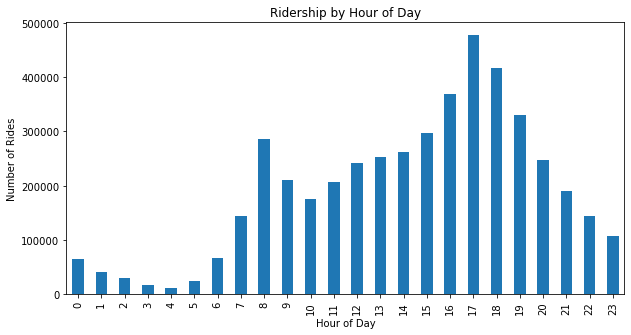

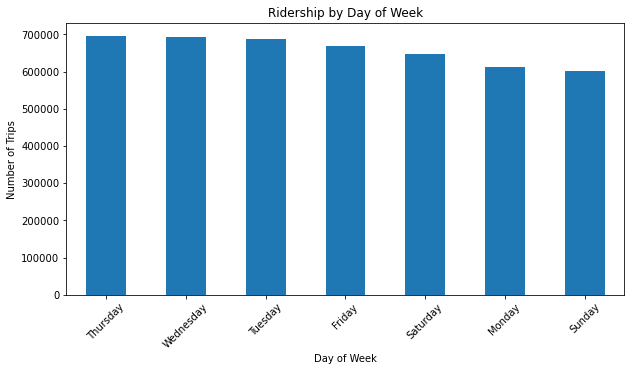

In [ ]:
# Graph ridership by hour of day and day of week.
# Ridership by hour of day.
df_bike_share['Hour'].value_counts().sort_index().plot(kind='bar', figsize=(10,5))
plt.title('Ridership by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Rides')
plt.show()

# Ridership by day of week.
df_bike_share['DayOfWeek'].value_counts().plot(kind='bar', figsize=(10,5))
plt.title('Ridership by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Examine most popular start and end stations.
display(df_bike_share['Start Station Name'].value_counts().head(10))
display(df_bike_share.groupby(['Start Station Name', 'End Station Name']).size().sort_values(ascending=False).head(10))


Bay St / College St (East Side)            39704
York St / Queens Quay W                    38527
Union Station                              34868
Bay St / Wellesley St W                    34320
Dundas St W / Yonge St                     32637
College Park - Yonge St Entrance           32321
Queen St W / John St                       31647
King St W / Brant St                       29976
Bay St / Queens Quay W (Ferry Terminal)    29289
Simcoe St / Queen St W                     29162
Name: Start Station Name, dtype: int64

Start Station Name                         End Station Name                         
Tommy Thompson Park (Leslie Street Spit)   Tommy Thompson Park (Leslie Street Spit)     7822
Bay St / Queens Quay W (Ferry Terminal)    Bay St / Queens Quay W (Ferry Terminal)      2869
York St / Queens Quay W                    York St / Queens Quay W                      2575
Front St W / Blue Jays Way                 Union Station                                2520
Humber Bay Shores Park / Marine Parade Dr  Humber Bay Shores Park / Marine Parade Dr    2516
Edward St / Yonge St                       Edward St / Yonge St                         1999
HTO Park (Queens Quay W)                   HTO Park (Queens Quay W)                     1846
Waterfront Trail (Rouge Hill)              Waterfront Trail (Rouge Hill)                1825
Lake Shore Blvd W / Ellis Ave              Lake Shore Blvd W / Ellis Ave                1704
Humber Bay Shores Park West                Humber Bay Shores Park West        

In [ ]:
# Count occurrences of each Start-End station pair.
route_counts = df_bike_share.groupby(['Start Station Name', 'End Station Name']).size().reset_index(name='Trip Count')

# Sort by trip count to get the most popular pairs.
route_counts = route_counts.sort_values(by='Trip Count', ascending=False)

# Add a column to check if the start and end stations are the same.
route_counts["Same Station?"] = route_counts["Start Station Name"] == route_counts["End Station Name"]

# Display top 20 popular station pairs.
display(route_counts.head(20))

,Start Station Name,End Station Name,Trip Count,Same Station?
172985,Tommy Thompson Park (Leslie Street Spit),Tommy Thompson Park (Leslie Street Spit),7822,True
21619,Bay St / Queens Quay W (Ferry Terminal),Bay St / Queens Quay W (Ferry Terminal),2869,True
195901,York St / Queens Quay W,York St / Queens Quay W,2575,True
76799,Front St W / Blue Jays Way,Union Station,2520,False
90837,Humber Bay Shores Park / Marine Parade Dr,Humber Bay Shores Park / Marine Parade Dr,2516,True
65875,Edward St / Yonge St,Edward St / Yonge St,1999,True
84126,HTO Park (Queens Quay W),HTO Park (Queens Quay W),1846,True
183111,Waterfront Trail (Rouge Hill),Waterfront Trail (Rouge Hill),1825,True
107601,Lake Shore Blvd W / Ellis Ave,Lake Shore Blvd W / Ellis Ave,1704,True
91456,Humber Bay Shores Park West,Humber Bay Shores Park West,1605,True


In [ ]:
# Display the top 10 trips where the start and end station are the same.
same_station_trips = df_bike_share[df_bike_share['Start Station Name'] == df_bike_share['End Station Name']]

# Group by station, count trips, and calculate average trip duration
same_station_summary = (
    same_station_trips.groupby('Start Station Name')
    .agg(
        Trip_Count=('Trip Id', 'count'),
        Average_Trip_Duration_Minutes=('Trip Duration (Minutes)', 'mean'),
        Casual_Members_Percentage=('User Type', lambda x: (x == 'Casual Member').mean()*100),
        Annual_Members_Percentage=('User Type', lambda x: (x == 'Annual Member').mean()*100)
    )
    .reset_index()
    .sort_values(by='Trip_Count', ascending=False)
    .head(10)
)

display(same_station_summary)

user_type_percentage = same_station_trips['User Type'].value_counts(normalize=True) * 100
user_type_percentage = user_type_percentage.round(2)

print("\nPercentage of riders by user type (for trips starting and ending at the same station):")
print(user_type_percentage)

,Start Station Name,Trip_Count,Average_Trip_Duration_Minutes,Casual_Members_Percentage,Annual_Members_Percentage
513,Tommy Thompson Park (Leslie Street Spit),7822,73.80,98.47,1.53
57,Bay St / Queens Quay W (Ferry Terminal),2869,101.91,98.99,1.01
583,York St / Queens Quay W,2575,50.36,98.37,1.63
263,Humber Bay Shores Park / Marine Parade Dr,2516,60.27,99.13,0.87
184,Edward St / Yonge St,1999,29.52,98.00,2.00
242,HTO Park (Queens Quay W),1846,43.16,98.48,1.52
545,Waterfront Trail (Rouge Hill),1825,67.25,99.51,0.49
311,Lake Shore Blvd W / Ellis Ave,1704,60.83,99.18,0.82
265,Humber Bay Shores Park West,1605,51.92,99.19,0.81
369,Ontario Place Blvd / Lake Shore Blvd W (East),1573,43.43,98.28,1.72



Percentage of riders by user type (for trips starting and ending at the same station):
Casual Member   97.18
Annual Member    2.82
Name: User Type, dtype: float64


In [ ]:
# Reading and displaying station information from JSON file.
# Load JSON file
with open('station_information.json', 'r') as file:
    data = json.load(file)

# Normalize stations data
stations_df = pd.json_normalize(data['data']['stations'])

# Rename columns.
stations_df.rename(columns={
    'station_id': 'Station Id',
    'name': 'Station Name',
    'lat': 'Latitude',
    'lon': 'Longitude'
}, inplace=True)

# Select only relevant columns
stations_df = stations_df[['Station Id', 'Station Name', 'Latitude', 'Longitude']]

pd.set_option('display.float_format', '{:.6f}'.format)

# Display the DataFrame
display(stations_df.head())


,Station Id,Station Name,Latitude,Longitude
0,7000,Fort York Blvd / Capreol Ct,43.639832,-79.395954
1,7001,Wellesley Station Green P,43.664964,-79.383550
2,7002,St. George St / Bloor St W,43.667131,-79.399555
3,7003,Madison Ave / Bloor St W,43.667018,-79.402796
4,7005,King St W / York St,43.648001,-79.383177


In [182]:
stations_df["Station Id"] = stations_df["Station Id"].astype(int)

In [ ]:
# Join station coordinates to main bike share data set.
df_bike_share = df_bike_share.merge(stations_df[["Station Id", "Latitude", "Longitude"]], left_on="Start Station Id", right_on="Station Id", how="left").rename(columns={"Latitude": "Start Latitude", "Longitude": "Start Longitude"}).drop(columns="Station Id")

df_bike_share = df_bike_share.merge(stations_df[["Station Id", "Latitude", "Longitude"]], left_on="End Station Id", right_on="Station Id", how="left").rename(columns={"Latitude": "End Latitude", "Longitude": "End Longitude"}).drop(columns="Station Id")

In [ ]:
# Output the combined data set to a new CSV file for analysis.
df_bike_share.to_csv("combined_data_Tableau.csv", index=False)